In [1]:
%matplotlib inline
#%matplotlib notebook
#https://drive.google.com/drive/folders/1qAN0YS7cR978CSuFOtIhAzv9RN_wBfbT

In [2]:
import cytoflow as flow
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib
import scipy.stats as stats
import scipy as sp
from scipy.stats.mstats import gmean
import scipy.optimize as opt
import numpy as np
from numpy import median
matplotlib.rc('figure', dpi = 160)

# Import samples and specify experimental condtions

sets the conditions of the tube

In [3]:
inputs = [

    # 1,9,17  Wt:W    
    # 2,10,18 Lux:W   
    # 3,11,19 Las:W   
    # 4,12,20 Tra:W   
    # 5,13,21 LuxR:LasI
    # 6,14,22 LuxR:LuxI
    # 7,15,23 LasR:LasI
    # 8,16,24 TraR:TraI
    # 25, 29, 33 WT:682
    # 26, 30, 34 Lux:682
    # 27, 31, 35 Las:682
    # 28, 32, 36 Tra:682


    
    
    


    
    

    ["Coculture 24h_Tube"+"_002"+".fcs",'LuxR','W-24','1'],
    ["Coculture 24h_Tube"+"_010"+".fcs",'LuxR','W-24','2'],
    ["Coculture 24h_Tube"+"_018"+".fcs",'LuxR','W-24','3'],
    
    ["Coculture 24h_Tube"+"_005"+".fcs",'LuxR','LasI-24','1'],
    ["Coculture 24h_Tube"+"_013"+".fcs",'LuxR','LasI-24','2'],
    ["Coculture 24h_Tube"+"_021"+".fcs",'LuxR','LasI-24','3'],
    
    ["Coculture 24h_Tube"+"_026"+".fcs",'LuxR','682-24','1'],
    ["Coculture 24h_Tube"+"_030"+".fcs",'LuxR','682-24','2'],
    ["Coculture 24h_Tube"+"_034"+".fcs",'LuxR','682-24','3'],
    
    ["Coculture 48h_Tube"+"_002"+".fcs",'LuxR','W-48','1'],
    ["Coculture 48h_Tube"+"_010"+".fcs",'LuxR','W-48','2'],
    ["Coculture 48h_Tube"+"_018"+".fcs",'LuxR','W-48','3'],
    
    ["Coculture 48h_Tube"+"_005"+".fcs",'LuxR','LasI-48','1'],
    ["Coculture 48h_Tube"+"_013"+".fcs",'LuxR','LasI-48','2'],
    ["Coculture 48h_Tube"+"_021"+".fcs",'LuxR','LasI-48','3'],
    
    ["Coculture 48h_Tube"+"_026"+".fcs",'LuxR','682-48','1'],
    ["Coculture 48h_Tube"+"_030"+".fcs",'LuxR','682-48','2'],
    ["Coculture 48h_Tube"+"_034"+".fcs",'LuxR','682-48','3'],
    
    ["Coculture 24h_Tube"+"_037"+".fcs",'WT','none','1'],
   
    
    
    
    
    


]

       
tubes = []
for filename, Rprotein, Iprotein, REP in inputs:
    tubes.append(flow.Tube(file = 'data/' + filename, conditions = {'Rprotein' : Rprotein, 'Iprotein' : Iprotein, 'REP' : REP}))
    
ex = flow.ImportOp(conditions = {'Rprotein' : 'str', 'Iprotein' : 'str', 'REP' : 'float'},
                   tubes = tubes).apply()
#tubes = []
#for filename, ahl, iptg, family in inputs:
#    tubes.append(flow.Tube(file = 'data/' + filename, conditions = {'AHL' : ahl, 'IPTG' : iptg, 'Family' : family}))
#    
#ex = flow.ImportOp(conditions = {'AHL' : 'float', 'IPTG' : 'float', 'Family' : 'str'},
#                   tubes = tubes).apply()

       


CytoflowError: FCS reader threw an error reading metadata for tube data/Coculture 24h_Tube_026.fcs

In [ ]:
flow.set_default_scale("log")

# Plot FITC-A histograms for all IPTG and AHL induction conditions

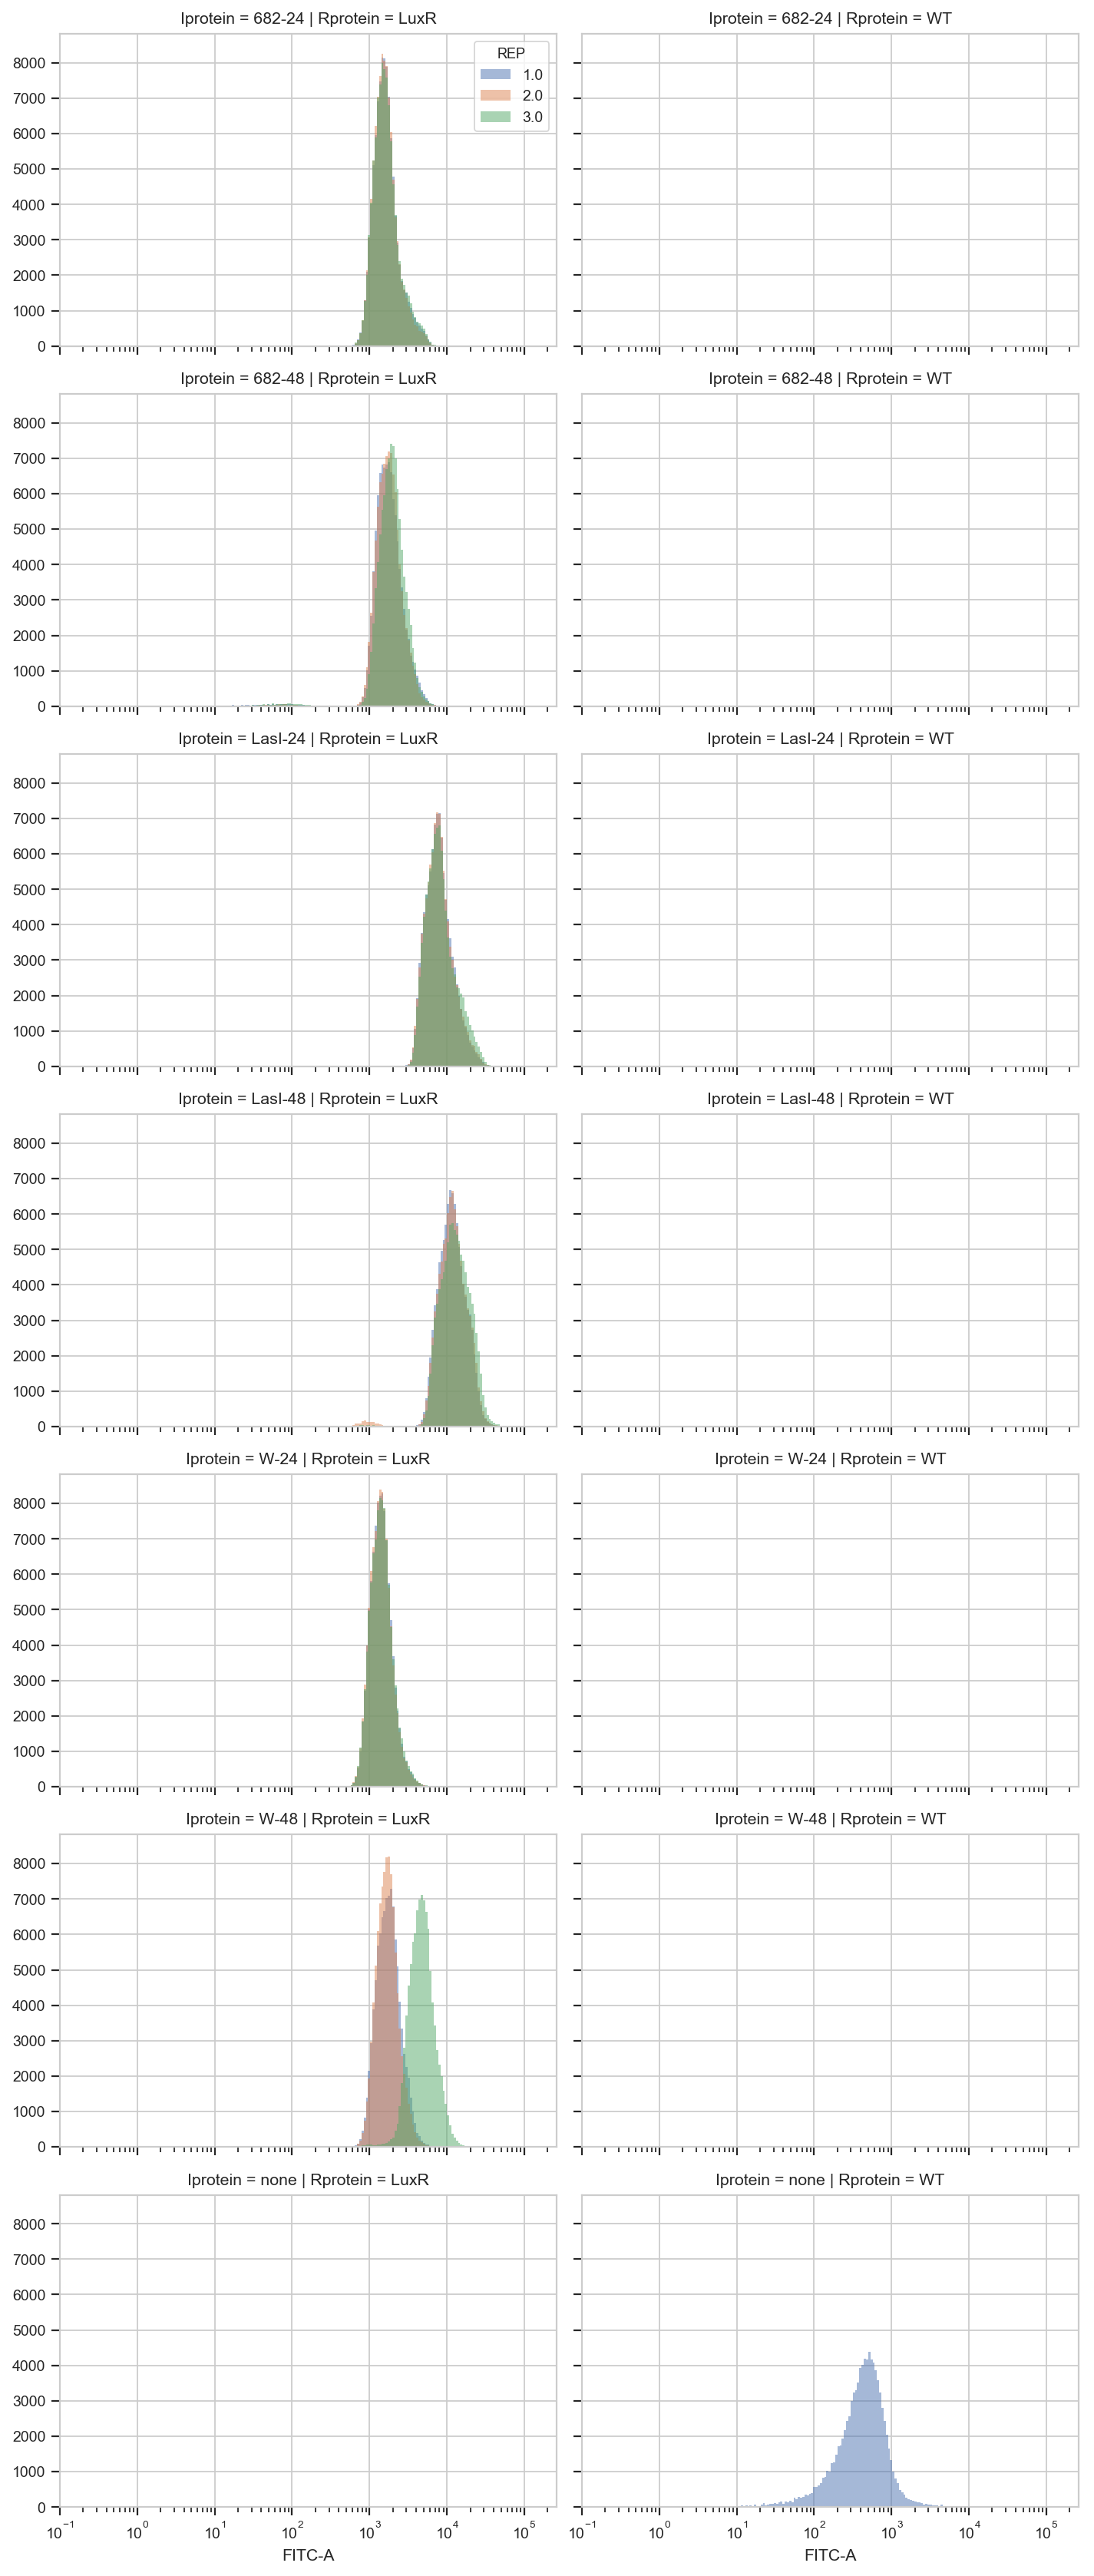

In [ ]:

flow.HistogramView(channel = "FITC-A",
                   xfacet = 'Rprotein',
                  yfacet = 'Iprotein',
                  huefacet = 'REP').plot(ex)


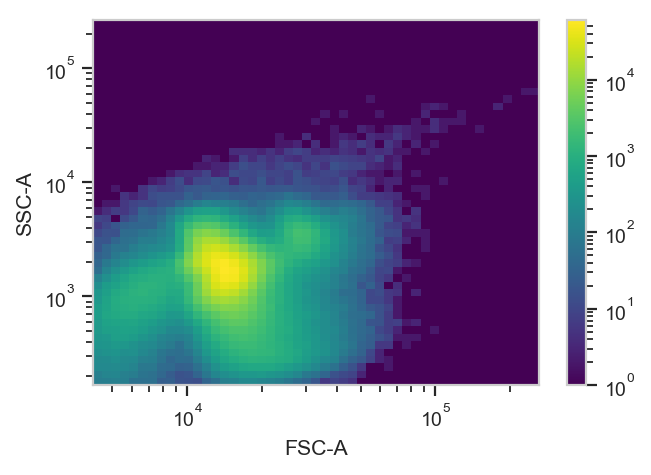

In [ ]:
flow.DensityView(xchannel = "FSC-A", 
                 ychannel = "SSC-A",
                 xscale = 'log',
                 yscale = 'log').plot(ex, min_quantile = 0.005)

# Singlet gating to remove doublets

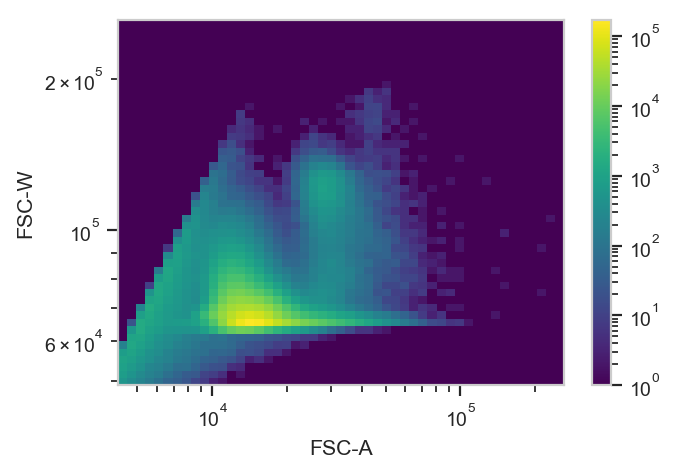

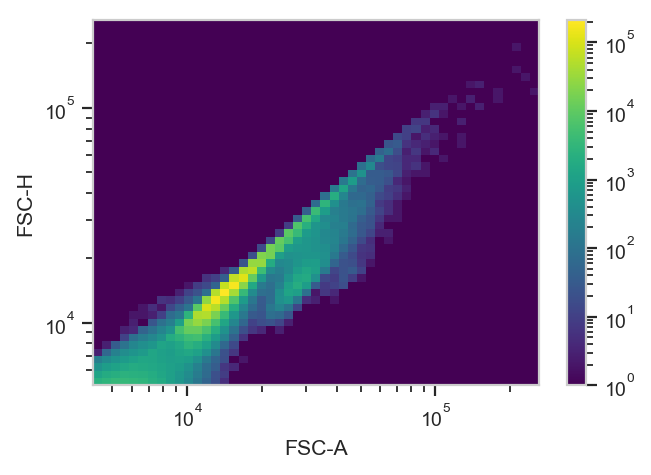

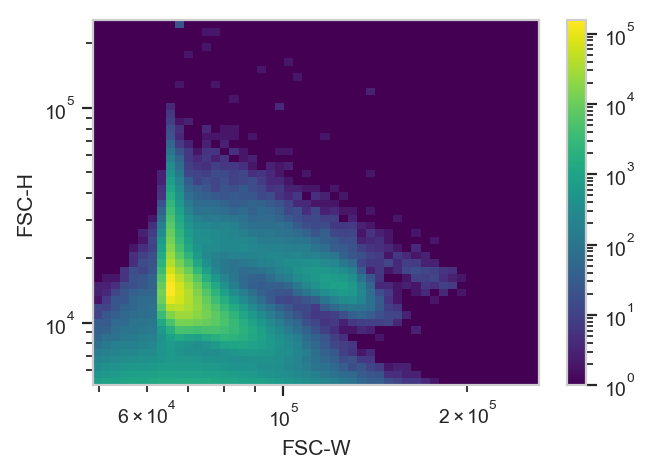

In [ ]:

#channels = ['FSC-A','FSC-W','FSC-H','SSC-A','SSC-W','SSC-H']
#perm = combinations(channels,2)
FSC = [('FSC-A','FSC-W'),('FSC-A','FSC-H'),('FSC-W','FSC-H')]

#f, axes = plt.subplots(ncols=4,nrows=4)
#axs = axes.ravel()
for i,(x,y) in enumerate(FSC):  
    flow.DensityView(xchannel = x, 
                ychannel = y,
                xscale = 'log',
                yscale = 'log').plot(ex, min_quantile = 0.005)


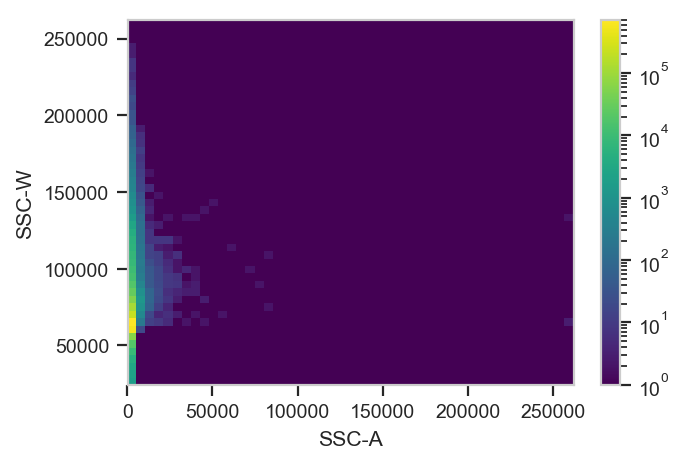

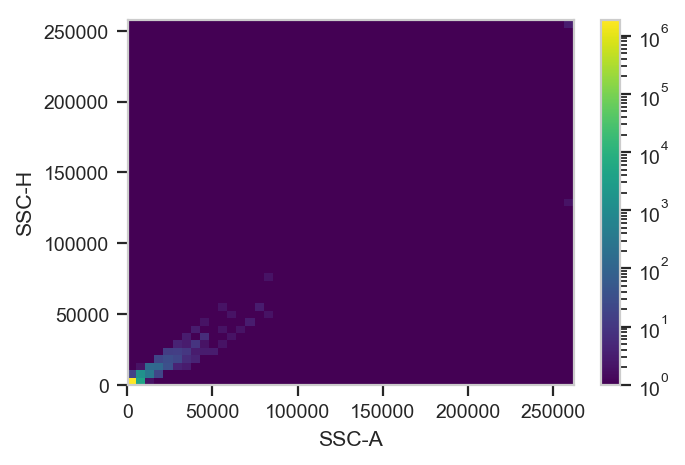

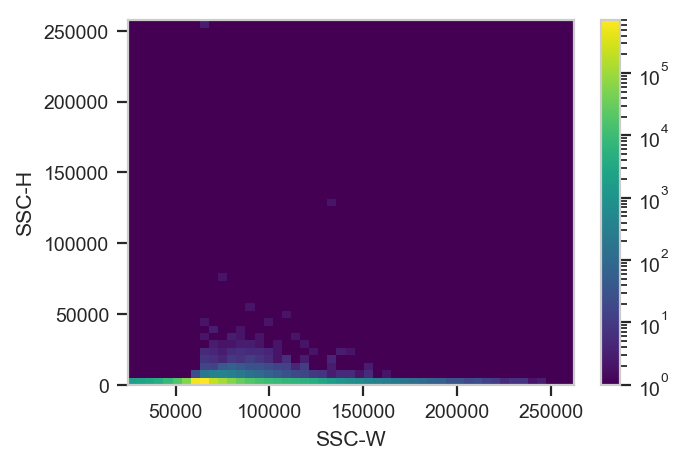

In [ ]:
SSC = [('SSC-A','SSC-W'),('SSC-A','SSC-H'),('SSC-W','SSC-H')]
for i,(x,y) in enumerate(SSC):  
    flow.DensityView(xchannel = x, 
                ychannel = y,
                xscale = 'linear',
                yscale = 'linear').plot(ex, min_quantile = 0.005)

## Create and store singlet gate

saves the single data as ex2

In [ ]:
Chlorophyl = flow.Range2DOp(name = "Chlorophyl",
                   xchannel = "PerCP-Cy5-5-A",
                   xlow = 2000,
                   xhigh = 90000,
                   ychannel = "SSC-A",
                   ylow = 100,
                   yhigh = 15000)
                   
Chlorophylv = Chlorophyl.default_view(xscale ='log',yscale='log')

ex = Chlorophyl.apply(ex)
ex.data.groupby('Chlorophyl').size()

Chlorophyl
False     101677
True     1798323
dtype: int64

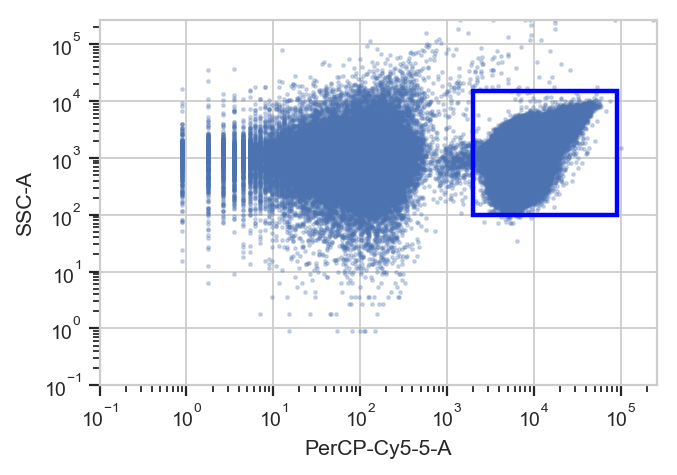

In [ ]:
Chlorophylv.plot(ex)

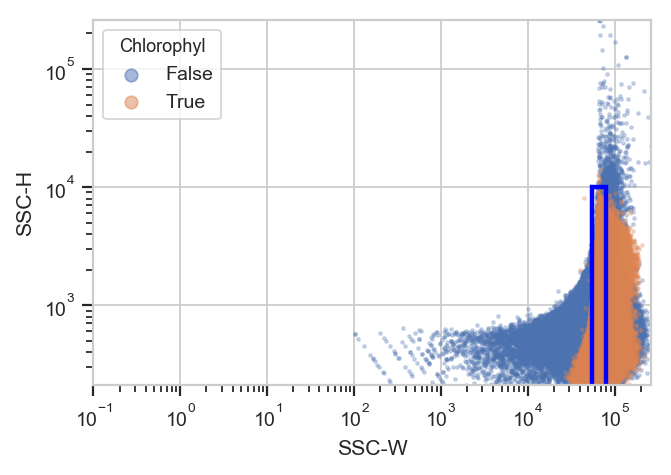

In [ ]:
r = flow.Range2DOp(name = "Range2D",
                   xchannel = "SSC-W",
                   xlow = 55000,
                   xhigh = 80000,
                   ychannel = "SSC-H",
                   ylow = 100,
                   yhigh = 10000)
                   
rv = r.default_view(xscale ='log',yscale='log',huefacet = 'Chlorophyl')

rv.plot(ex)
ex = r.apply(ex)

In [ ]:
ex.data.groupby('Range2D').size()

Range2D
False     203072
True     1696928
dtype: int64

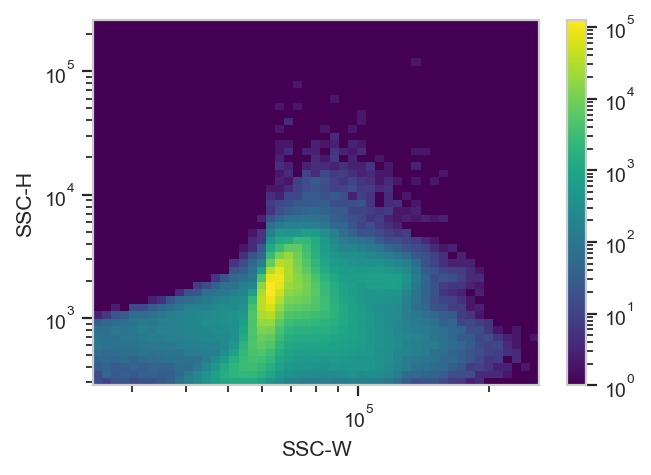

In [ ]:
flow.DensityView(xchannel = "SSC-W", 
                 ychannel = "SSC-H",
                 xscale = 'log',
                 yscale = 'log').plot(ex, min_quantile = 0.005)

## Use a gaussian mixture model to further gate the population

/opt/anaconda3/envs/flow/lib/python3.6/site-packages/cytoflow/operations/gaussian.py:529: RuntimeWarning: invalid value encountered in less_equal
/opt/anaconda3/envs/flow/lib/python3.6/site-packages/cytoflow/operations/base_op_views.py:342: CytoflowViewWarning: Setting 'huefacet' to 'GM_1'


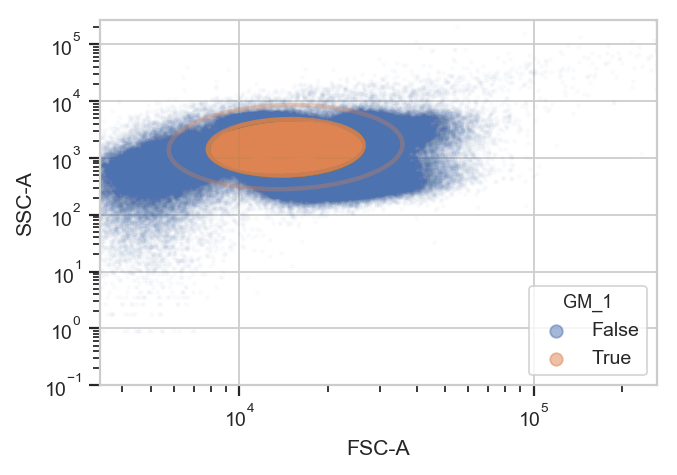

In [ ]:
gm = flow.GaussianMixtureOp(name = "GM",
                            channels = ['FSC-A', 'SSC-A'],
                            scale = {'FSC-A' : 'log',
                                     'SSC-A' : 'log'},
                            num_components = 1,
                            sigma = 2)
gm.estimate(ex)
ex = gm.apply(ex)
gm.default_view().plot(ex, alpha = 0.02)

/opt/anaconda3/envs/flow/lib/python3.6/site-packages/cytoflow/operations/gaussian.py:529: RuntimeWarning: invalid value encountered in less_equal
/opt/anaconda3/envs/flow/lib/python3.6/site-packages/cytoflow/operations/base_op_views.py:342: CytoflowViewWarning: Setting 'huefacet' to 'GM3_1'


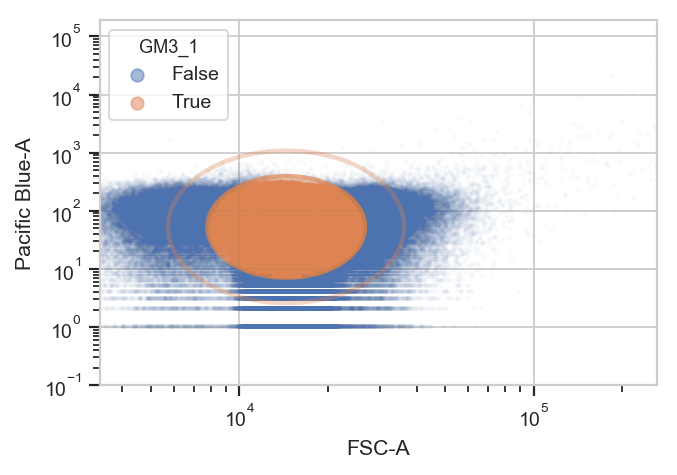

In [ ]:
gm3 = flow.GaussianMixtureOp(name = "GM3",
                            channels = ['FSC-A', 'Pacific Blue-A'],
                            scale = {'FSC-A' : 'log',
                                     'Pacific Blue-A' : 'log'},
                            num_components = 1,
                            sigma = 2)
gm3.estimate(ex)
ex = gm3.apply(ex)
gm3.default_view().plot(ex, alpha = 0.02)

In [ ]:
df =ex.data

In [ ]:
ex.data.head()

,AmCyan-A,AmCyan-H,AmCyan-W,FITC-A,FITC-H,FITC-W,FSC-A,FSC-H,FSC-W,Iprotein,...,REP,Rprotein,SSC-A,SSC-H,SSC-W,Time,Chlorophyl,Range2D,GM_1,GM3_1
0,5.300000,121.0,2870.584717,1174.799927,1122.0,68620.046875,13613.040039,13766.0,64807.800781,W-24,...,1.0,LuxR,1154.329956,1282.0,59009.492188,54.500000,True,True,True,False
1,126.139992,86.0,96124.539062,1167.679932,1254.0,61024.777344,14631.280273,14626.0,65559.664062,W-24,...,1.0,LuxR,1425.780029,1510.0,61880.746094,54.599998,True,True,True,True
2,139.919998,108.0,84905.531250,1564.619995,1591.0,64449.363281,13748.459961,13619.0,66158.968750,W-24,...,1.0,LuxR,1557.500000,1603.0,63675.804688,54.599998,True,True,True,True
3,223.659988,137.0,106991.101562,3678.369873,2102.0,114683.945312,24242.400391,15538.0,102249.320312,W-24,...,1.0,LuxR,3808.310059,2114.0,118061.210938,54.599998,True,False,False,True
4,208.819992,97.0,141084.796875,1412.429932,1401.0,66070.671875,11793.379883,11565.0,66830.179688,W-24,...,1.0,LuxR,1925.069946,1997.0,63175.449219,54.700001,True,True,True,True


take the stuff from cytoflow and changing it to datatframe

# filter out events that don't fall within the gates

In [ ]:

df = df[(df.GM_1==True) & (df.GM3_1==True) & (df.Range2D==True) & (df.Chlorophyl==True) & (df['FITC-A'] >0)] 
#df
# 

In [ ]:
#f, ax = plt.subplots()
#sns.kdeplot(x='SSC-W',y='SSC-H',data=df[['SSC-W', 'SSC-H']],ax=ax)

In [ ]:
df.columns 



Index(['AmCyan-A', 'AmCyan-H', 'AmCyan-W', 'FITC-A', 'FITC-H', 'FITC-W',
       'FSC-A', 'FSC-H', 'FSC-W', 'Iprotein', 'Pacific Blue-A',
       'Pacific Blue-H', 'Pacific Blue-W', 'PerCP-Cy5-5-A', 'PerCP-Cy5-5-H',
       'PerCP-Cy5-5-W', 'REP', 'Rprotein', 'SSC-A', 'SSC-H', 'SSC-W', 'Time',
       'Chlorophyl', 'Range2D', 'GM_1', 'GM3_1'],
      dtype='object')

In [ ]:
data = df[['FITC-A','Rprotein','Iprotein','REP']]
#data.insert(4,'Replicate',2)
#data.to_pickle('../compiled-data/se/lux/LuxSE_2.pkl')
#uncomment these when you are ready to save replicates and compile replicate from other runs
#data['FITC-A']
#data[data.Iprotein=='W-24']['FITC-A'].median()
#data[data.Iprotein=='W-48']['FITC-A'].median()
#data[data.Iprotein=='LuxI-48']['FITC-A']#-data[data.Iprotein=='W-48']['FITC-A'].median()

In [ ]:
#data[data.Iprotein=='LuxI-48']['FITC-A']-data[data.Iprotein=='W-48']['FITC-A'].median()

In [ ]:
# Subtract WT background from samples
data = df[['FITC-A','Rprotein','Iprotein','REP']]
data['FITC-A'] = data['FITC-A'] - data[data.Rprotein=='WT']['FITC-A'].median()
data['FITC-A'] = data[data['FITC-A'] > 0]['FITC-A']
#data = data[data.Family=='Lux_rep1']
#data.drop('Family',inplace=True,axis=1)

/opt/anaconda3/envs/flow/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/anaconda3/envs/flow/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [ ]:
data['FITC-A'].min()

5.339996337890625

In [ ]:
data

,FITC-A,Rprotein,Iprotein,REP
1,767.179932,LuxR,W-24,1.0
2,1164.119995,LuxR,W-24,1.0
4,1011.929932,LuxR,W-24,1.0
5,937.169922,LuxR,W-24,1.0
6,925.599976,LuxR,W-24,1.0
12,3132.800049,LuxR,W-24,1.0
13,1190.819946,LuxR,W-24,1.0
14,1114.280029,LuxR,W-24,1.0
16,674.619995,LuxR,W-24,1.0
19,1180.140015,LuxR,W-24,1.0


# Plot median FITC-A

use median or geometeric mean 

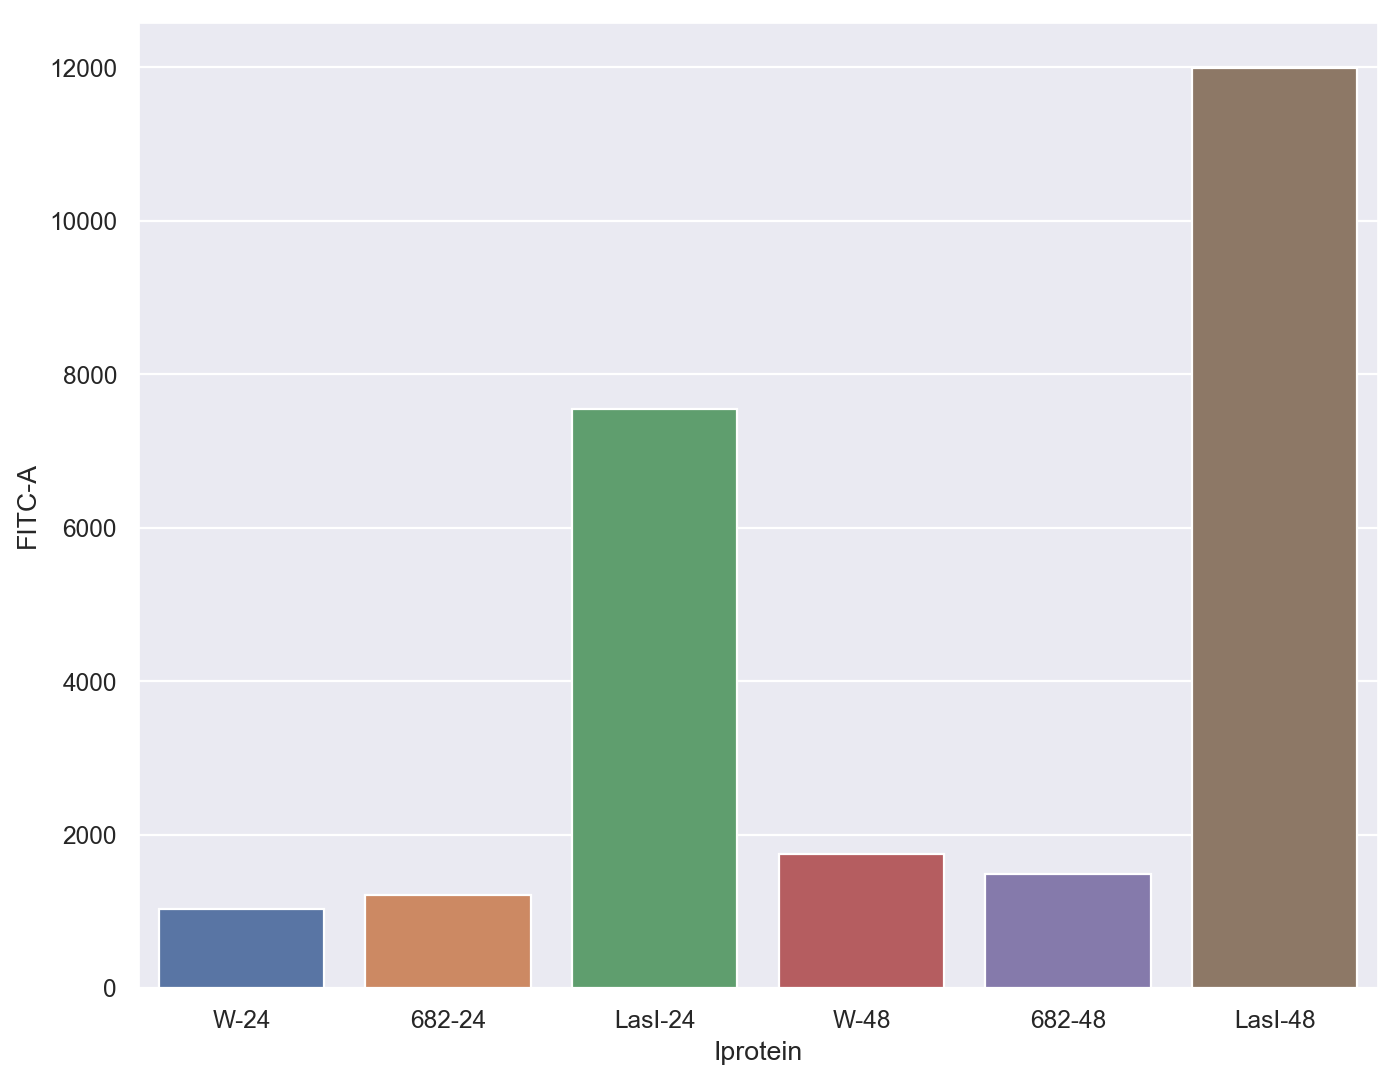

In [ ]:
mfi = data.groupby(['Rprotein','Iprotein'])['FITC-A'].median().reset_index()
sns.set(font_scale=1.0)
f, ax = plt.subplots(figsize=(10,8))

#sns.pointplot(x='Rprotein',y='FITC-A',hue='Iprotein',data=mfi)
sns.barplot(x='Iprotein',y='FITC-A',data=mfi,order=['W-24','682-24','LasI-24','W-48','682-48','LasI-48'],ci=85)

#f.savefig('TraR*.png',dpi=600)
f.savefig('LuxR_LasI_coculture.png',dpi=600, transparent=True)

STOP HERE